In [41]:
# !pip install pandas numpy matplotlib seaborn
# !pip3 install scikit-learn



In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
     

In [43]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [44]:


train_images.shape



(60000, 28, 28)

In [45]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

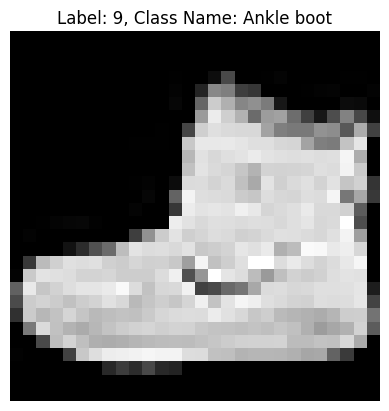

In [46]:
image = train_images[0].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_labels[0]}, Class Name: {class_names[train_labels[0]]}")
plt.axis("off")
plt.show()



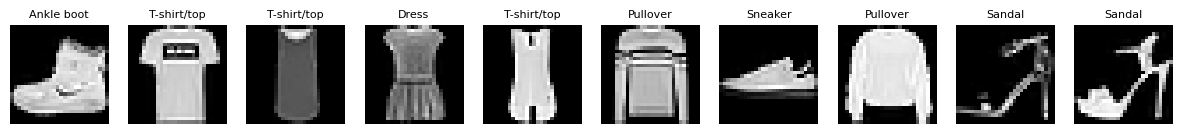

In [47]:
num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

for i in range(num_images):
    image = train_images[i].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"{class_names[train_labels[i]]}", fontsize=8)
    axes[i].axis('off')
plt.show()



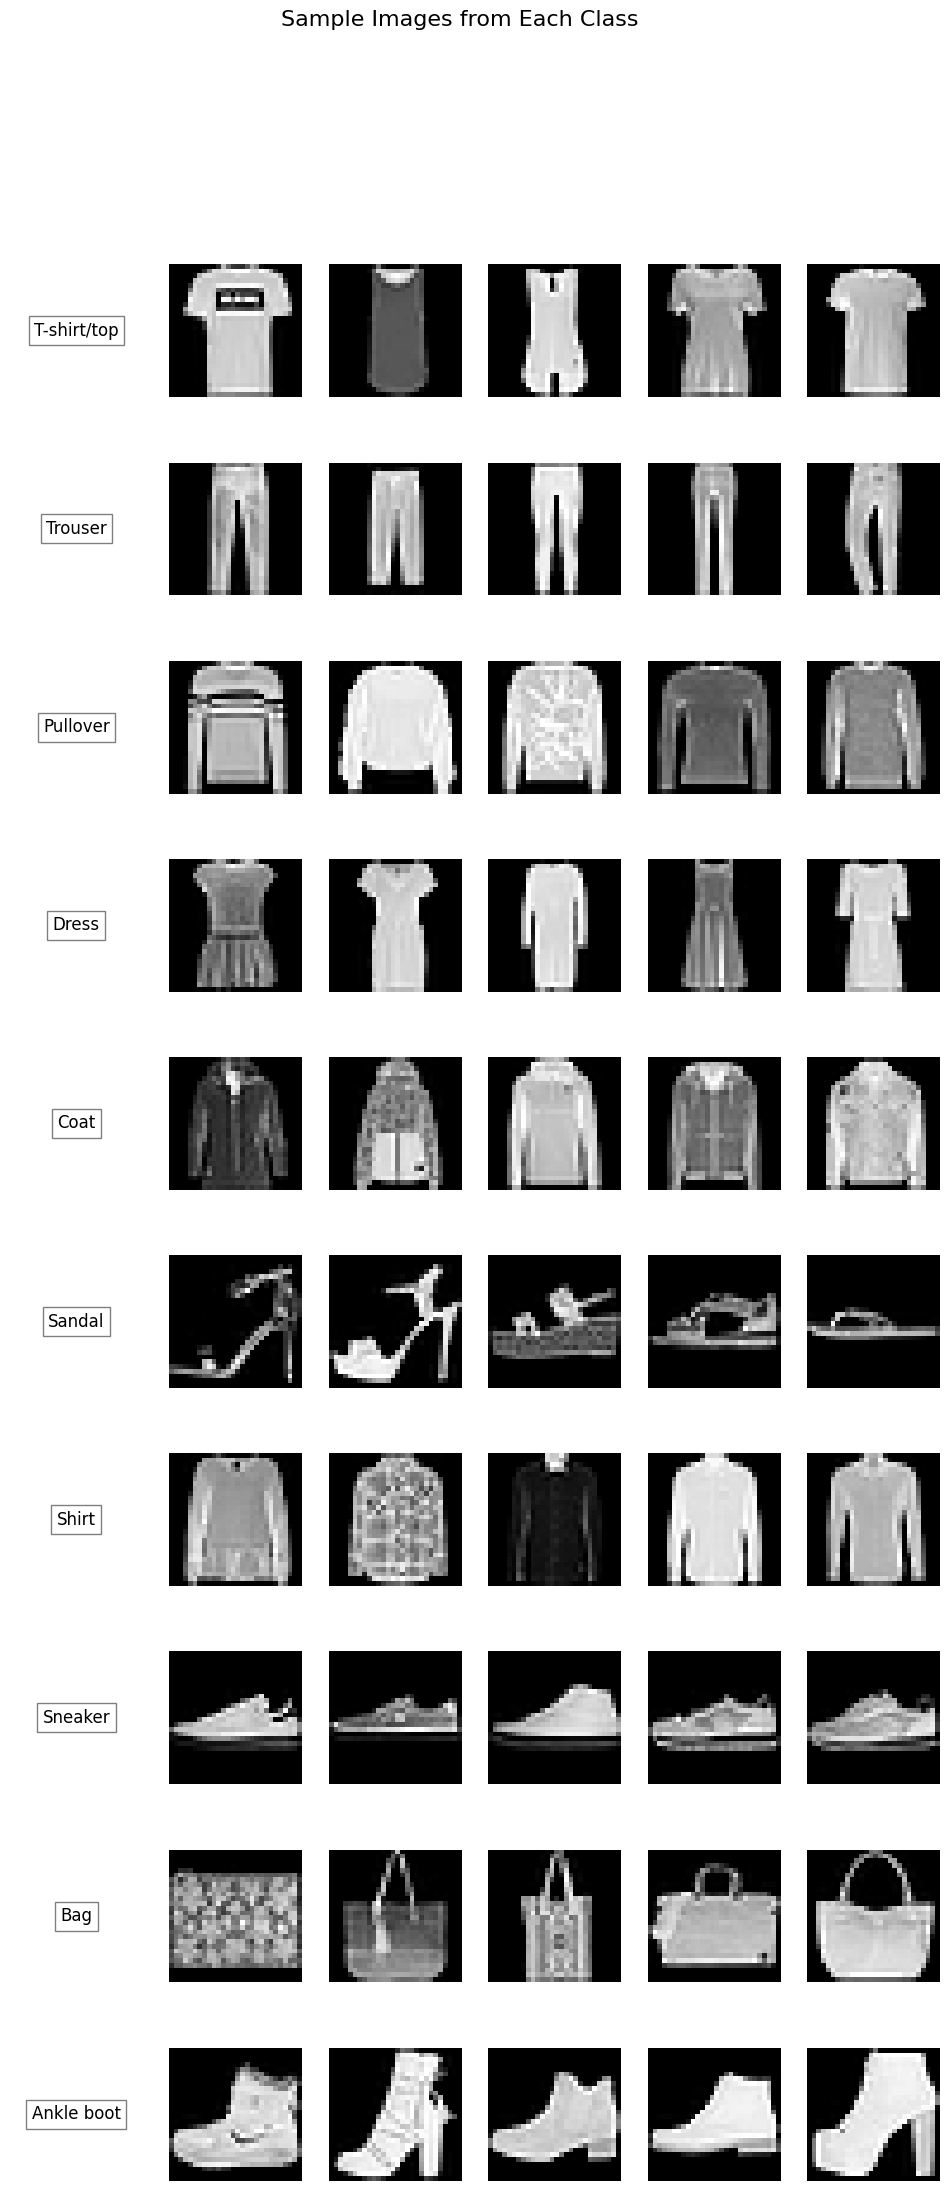

In [48]:
num_classes = len(class_names)
images_per_class = 5

fig, axes = plt.subplots(num_classes, images_per_class + 1, figsize=(12, num_classes * 2.5))

for i, class_name in enumerate(class_names):
    axes[i, 0].text(0.5, 0.5, class_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axes[i, 0].axis('off')
    class_indices = [index for index, label in enumerate(train_labels) if label == i]

    for j in range(images_per_class):
        image = train_images[class_indices[j]].reshape(28, 28)
        axes[i, j + 1].imshow(image, cmap='gray')
        axes[i, j + 1].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.show()



In [49]:
train_labels_named = [class_names[label] for label in train_labels]
class_counts = pd.Series(train_labels_named).value_counts()
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']
class_counts_df

,Class,Count
0,Ankle boot,6000
1,T-shirt/top,6000
2,Dress,6000
3,Pullover,6000
4,Sneaker,6000
5,Sandal,6000
6,Trouser,6000
7,Shirt,6000
8,Coat,6000
9,Bag,6000


In [50]:
!pip install seaborn


C:\Users\vivek\AppData\Local\Temp\ipykernel_15748\2670802174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')


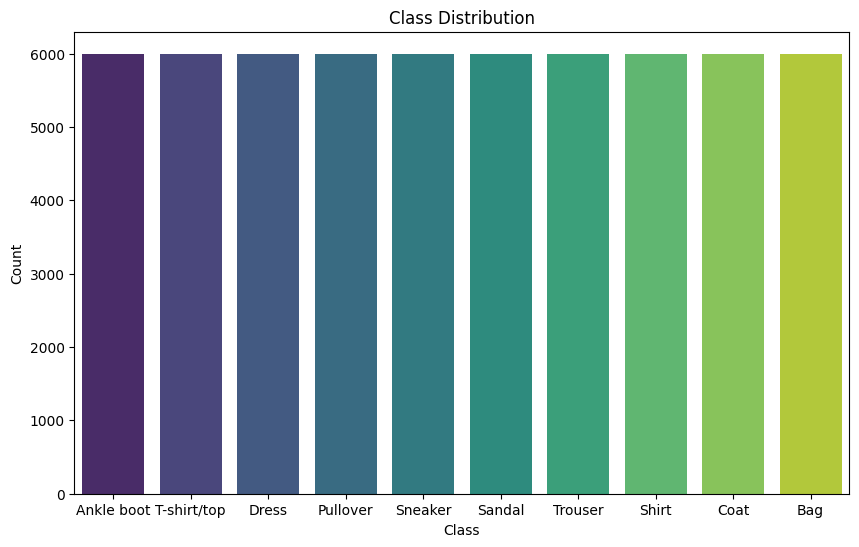

In [51]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [53]:
x_test = test_images
y_test = test_labels

In [54]:
from tensorflow.keras import models, layers

# Adjust model architecture
model1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),  # Input shape for grayscale images
    layers.Flatten(),  # Flatten the input to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print the model summary
model1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-tr

In [55]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [57]:
# Assuming x_train is your training data
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)  # Similarly for validation data

# Fit the model
history = model1.fit(x_train, y_train,
                      validation_data=(x_valid, y_valid),
                      epochs=30,
                      batch_size=32,
                      callbacks=[early_stopping])


Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5358 - accuracy: 0.8102 - val_loss: 0.4372 - val_accuracy: 0.8401
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3839 - accuracy: 0.8594 - val_loss: 0.4071 - val_accuracy: 0.8528
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3441 - accuracy: 0.8729 - val_loss: 0.3698 - val_accuracy: 0.8643
Epoch 4/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3218 - accuracy: 0.8792 - val_loss: 0.3438 - val_accuracy: 0.8758
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3011 - accuracy: 0.8890 - val_loss: 0.3370 - val_accuracy: 0.8786
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2874 - accuracy: 0.8934 - val_loss: 0.3509 - val_accuracy: 0.8743
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2747 - accuracy: 0.8981 - val_loss: 0.3237 - val_accuracy:

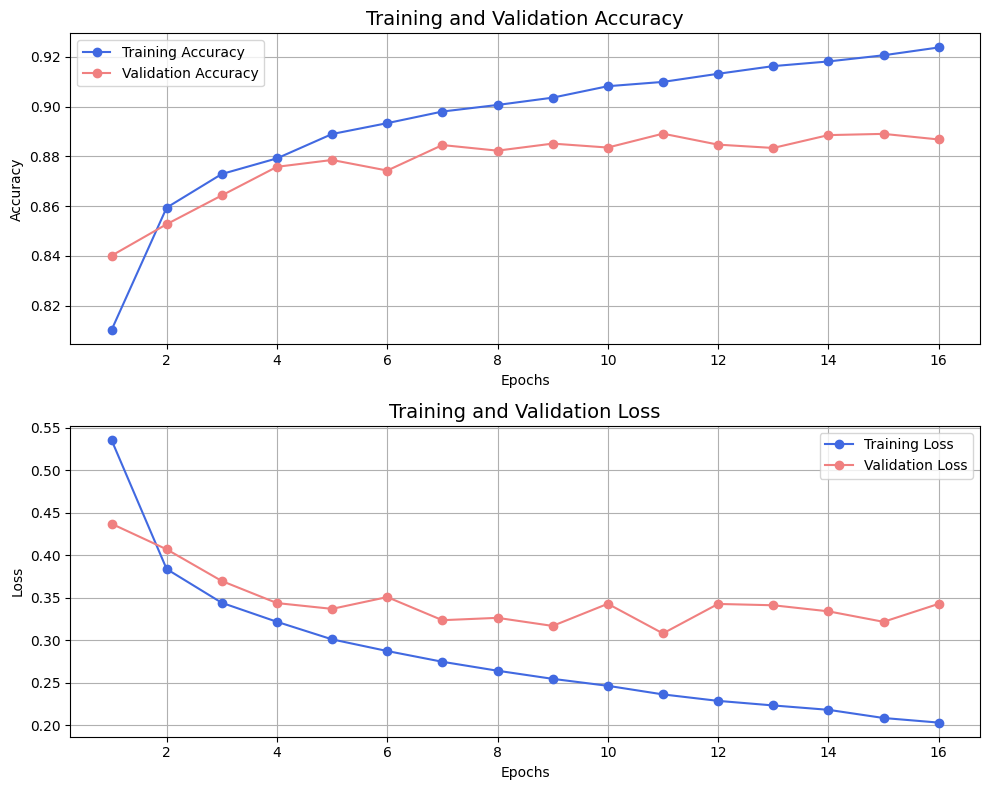

In [58]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    epochs = range(1, len(acc) + 1)


    ax[0].plot(epochs, acc, color='royalblue', linestyle='-', marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, color='lightcoral', linestyle='-', marker='o', label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy', fontsize=14)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    ax[1].plot(epochs, loss, color='royalblue', linestyle='-', marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, color='lightcoral', linestyle='-', marker='o', label='Validation Loss')
    ax[1].set_title('Training and Validation Loss', fontsize=14)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_history(history)



In [59]:
predictions = model1.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
df_predictions = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})

df_predictions.head(10)

313/313 [==============================] - 1s 2ms/step


,True Label,Predicted Label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


# Building a CNN

In [60]:
# Reshape images
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

In [61]:
model2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [62]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model2.fit(x_train_reshaped, y_train,
                    validation_data=(x_valid_reshaped, y_valid),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
750/750 [==============================] - 9s 12ms/step - loss: 0.7133 - accuracy: 0.7371 - val_loss: 0.4575 - val_accuracy: 0.8347
Epoch 2/50
750/750 [==============================] - 11s 14ms/step - loss: 0.4779 - accuracy: 0.8242 - val_loss: 0.3673 - val_accuracy: 0.8628
Epoch 3/50
750/750 [==============================] - 11s 14ms/step - loss: 0.4215 - accuracy: 0.8464 - val_loss: 0.3369 - val_accuracy: 0.8768
Epoch 4/50
750/750 [==============================] - 12s 16ms/step - loss: 0.3870 - accuracy: 0.8591 - val_loss: 0.3209 - val_accuracy: 0.8787
Epoch 5/50
750/750 [==============================] - 11s 14ms/step - loss: 0.3635 - accuracy: 0.8672 - val_loss: 0.3027 - val_accuracy: 0.8870
Epoch 6/50
750/750 [==============================] - 11s 14ms/step - loss: 0.3462 - accuracy: 0.8743 - val_loss: 0.2898 - val_accuracy: 0.8953
Epoch 7/50
750/750 [==============================] - 11s 14ms/step - loss: 0.3320 - accuracy: 0.8798 - val_loss: 0.2729 - val_accuracy: 

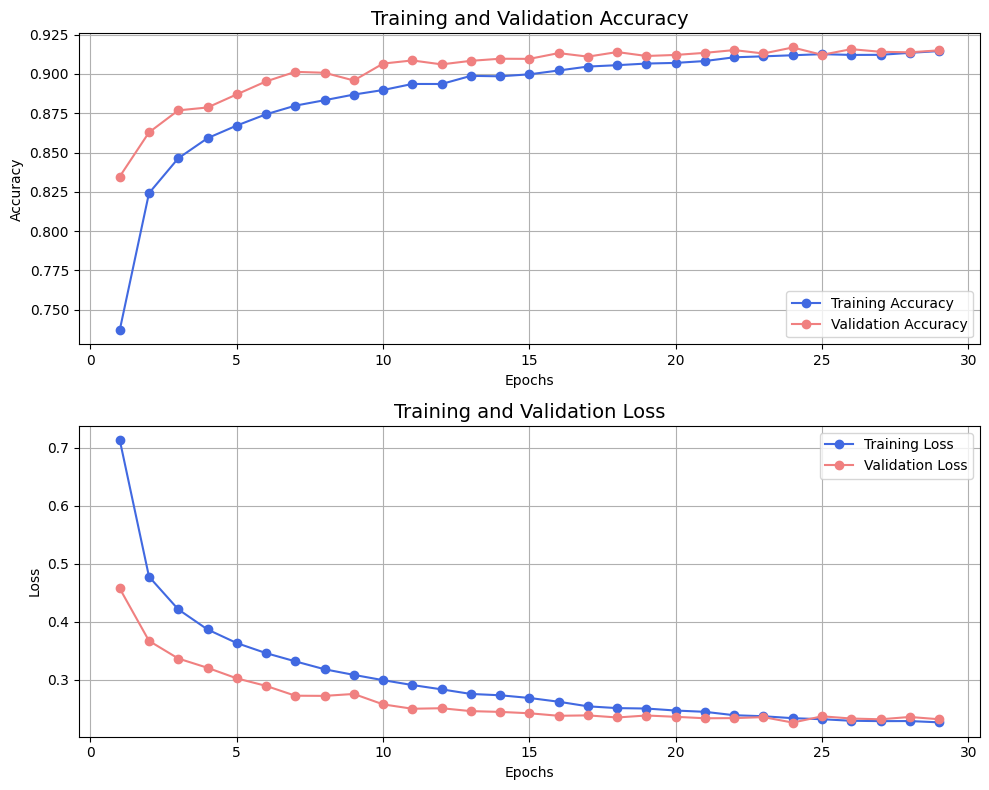

In [64]:


plot_history(history)



In [65]:
predictions = model2.predict(x_test_reshaped)
predicted_classes = predictions.argmax(axis=1)

results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})


results_df.head()

313/313 [==============================] - 1s 2ms/step


,True Label,Predicted Label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [66]:
test_loss, test_accuracy = model2.evaluate(x_test_reshaped, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.9116
Test Loss: 0.2445
Test Accuracy: 0.9116


In [67]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.84      0.90      0.87      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.88      0.85      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.72      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



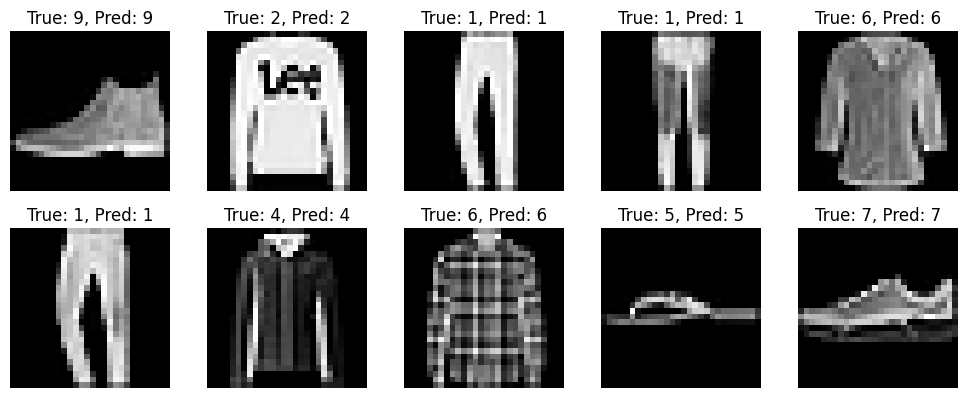

In [68]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()